<a href="https://colab.research.google.com/github/ZRooker/AI/blob/main/AI_Hw_4_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import Necessary Functions 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_wine
vine = load_wine()

#Putting vine dataset into a dataframe for better visualization
df = pd.DataFrame(data=vine.data, columns=vine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# # PRINT FOR YOUR INTUITION SO YOU KNOW THE DIMENSIONS YOU ARE WORKING WITH
print(vine.data.shape) #.data contains the features
print(vine.target.shape)
print(vine.target[0]) #.target contains the target variables

(178, 13)
(178,)
0


In [4]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vine.data, vine.target.astype('int'), test_size=0.20)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model with the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
4/4 [==============================] - 2s 195ms/step - loss: 1.2795 - accuracy: 0.2389 - val_loss: 1.0906 - val_accuracy: 0.5172
Epoch 2/20
4/4 [==============================] - 0s 21ms/step - loss: 1.0984 - accuracy: 0.4248 - val_loss: 0.9704 - val_accuracy: 0.5172
Epoch 3/20
4/4 [==============================] - 0s 20ms/step - loss: 0.9498 - accuracy: 0.5398 - val_loss: 0.8640 - val_accuracy: 0.5517
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 0.8207 - accuracy: 0.6991 - val_loss: 0.7674 - val_accuracy: 0.7586
Epoch 5/20
4/4 [==============================] - 0s 32ms/step - loss: 0.7139 - accuracy: 0.7876 - val_loss: 0.6789 - val_accuracy: 0.8276
Epoch 6/20
4/4 [==============================] - 0s 38ms/step - loss: 0.6236 - accuracy: 0.8938 - val_loss: 0.6028 - val_accuracy: 0.8966
Epoch 7/20
4/4 [==============================] - 0s 42ms/step - loss: 0.5498 - accuracy: 0.9381 - val_loss: 0.5372 - val_accuracy: 0.8966
Epoch 8/20
4/4 [==========

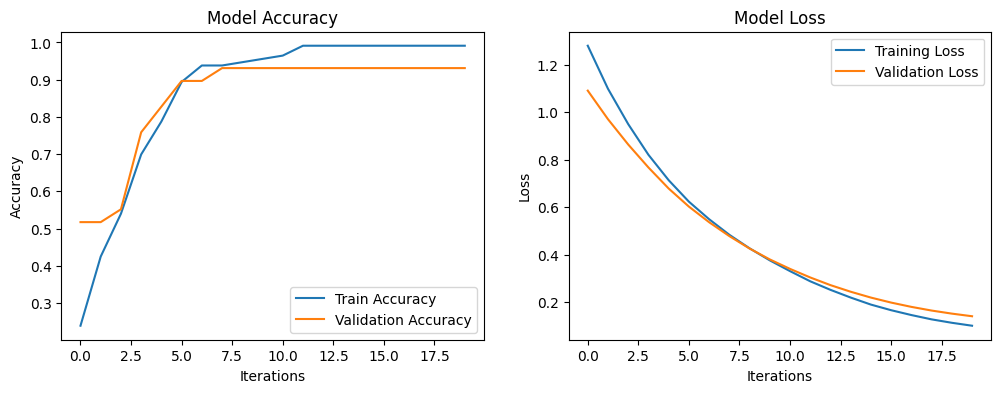

In [5]:
# Plot the training and validation accuracy vs. iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')

# Plot the training and validation loss vs. iterations
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()